# Optimizing length of Peer Reviews

## Importing dataset and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../Datasets/final_dataset.csv')

In [3]:
df.head()

,IMPACT,SUBSTANCE,APPROPRIATENESS,SOUNDNESS_CORRECTNESS,ORIGINALITY,RECOMMENDATION,CLARITY,REVIEWER_CONFIDENCE,comments,strengths,...,sentence_complexity,technical_depth,total_word_count,strength_word_count,weakness_word_count,discussion_word_count,normalized_length,unique_key_points,information_density,unique_insights_per_word
0,0.6,0.8,1.0,0.8,0.6,0.6,0.6,0.6,- Strengths:\n* Outperforms ALIGN in supervise...,* Outperforms ALIGN in supervised entity linki...,...,12,3.695000,230,56,167,0,0.544987,3,0.013043,0.004064
1,0.6,0.8,1.0,0.8,0.6,0.8,0.6,0.8,This paper addresses the problem of disambigua...,NaN,...,37,1.396757,724,0,0,0,1.715525,7,0.009669,0.001304
2,0.6,0.8,0.8,0.8,0.6,0.8,0.6,0.8,"- Strengths:\nGood ideas, simple neural learni...","Good ideas, simple neural learning, interestin...",...,23,2.533913,303,16,0,0,0.717961,3,0.009901,0.003142
3,0.6,0.8,1.0,0.8,0.6,0.6,1.0,0.8,- Strengths:\nThe idea of hard monotonic atten...,The idea of hard monotonic attention is new an...,...,12,3.872500,199,13,46,133,0.471532,2,0.010050,0.004509
4,0.6,0.8,1.0,0.8,0.6,0.6,1.0,0.6,- Strengths: A new encoder-decoder model is pr...,NaN,...,55,1.008000,887,0,0,848,2.101755,9,0.010147,0.001089


In [5]:
df.columns

Index(['IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'SOUNDNESS_CORRECTNESS',
       'ORIGINALITY', 'RECOMMENDATION', 'CLARITY', 'REVIEWER_CONFIDENCE',
       'comments', 'strengths', 'weaknesses', 'general_discussion',
       'content_relevance', 'evidence_support', 'strength_argument_score',
       'weakness_argument_score', 'argument_strength', 'readability_index',
       'sentence_complexity', 'technical_depth', 'total_word_count',
       'strength_word_count', 'weakness_word_count', 'discussion_word_count',
       'normalized_length', 'unique_key_points', 'information_density',
       'unique_insights_per_word'],
      dtype='object')

## Preprocessing

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
IMPACT                        6
SUBSTANCE                     0
APPROPRIATENESS               0
SOUNDNESS_CORRECTNESS         0
ORIGINALITY                   0
RECOMMENDATION                0
CLARITY                       0
REVIEWER_CONFIDENCE           0
comments                      0
strengths                   111
weaknesses                  111
general_discussion          122
content_relevance             0
evidence_support              0
strength_argument_score       0
weakness_argument_score       0
argument_strength             0
readability_index             0
sentence_complexity           0
technical_depth               0
total_word_count              0
strength_word_count           0
weakness_word_count           0
discussion_word_count         0
normalized_length             0
unique_key_points             0
information_density           0
unique_insights_per_word      0
dtype: int64


In [7]:
numerical_columns = ['IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'SOUNDNESS_CORRECTNESS',
       'ORIGINALITY', 'RECOMMENDATION', 'CLARITY', 'REVIEWER_CONFIDENCE',
       'content_relevance', 'evidence_support', 'strength_argument_score',
       'weakness_argument_score', 'argument_strength', 'readability_index',
       'sentence_complexity', 'technical_depth', 'total_word_count',
       'strength_word_count', 'weakness_word_count', 'discussion_word_count',
       'normalized_length', 'unique_key_points', 'information_density',
       'unique_insights_per_word']

for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
text_columns = ['strengths', 'weaknesses', 'general_discussion', 'comments']
for col in text_columns:
    df[col].fillna("No information available", inplace=True)

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

IMPACT                      0
SUBSTANCE                   0
APPROPRIATENESS             0
SOUNDNESS_CORRECTNESS       0
ORIGINALITY                 0
RECOMMENDATION              0
CLARITY                     0
REVIEWER_CONFIDENCE         0
comments                    0
strengths                   0
weaknesses                  0
general_discussion          0
content_relevance           0
evidence_support            0
strength_argument_score     0
weakness_argument_score     0
argument_strength           0
readability_index           0
sentence_complexity         0
technical_depth             0
total_word_count            0
strength_word_count         0
weakness_word_count         0
discussion_word_count       0
normalized_length           0
unique_key_points           0
information_density         0
unique_insights_per_word    0
dtype: int64


In [10]:
print("Basic Statistics of the Dataset:")
print(df.describe())

Basic Statistics of the Dataset:
           IMPACT   SUBSTANCE  APPROPRIATENESS  SOUNDNESS_CORRECTNESS  \
count  248.000000  248.000000       248.000000             248.000000   
mean     0.638710    0.713710         0.968548               0.804032   
std      0.109994    0.168266         0.092528               0.183929   
min      0.400000    0.200000         0.400000               0.400000   
25%      0.600000    0.600000         1.000000               0.600000   
50%      0.600000    0.800000         1.000000               0.800000   
75%      0.600000    0.800000         1.000000               1.000000   
max      1.000000    1.000000         1.000000               1.000000   

       ORIGINALITY  RECOMMENDATION     CLARITY  REVIEWER_CONFIDENCE  \
count   248.000000      248.000000  248.000000           248.000000   
mean      0.770161        0.666129    0.792742             0.775806   
std       0.172376        0.180367    0.180271             0.148608   
min       0.400000       

## Finding Key Relations

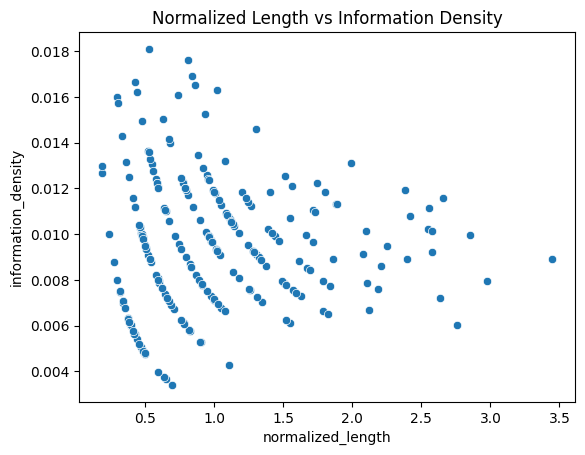

In [11]:
sns.scatterplot(data=df, x='normalized_length', y='information_density')
plt.title("Normalized Length vs Information Density")
plt.show()

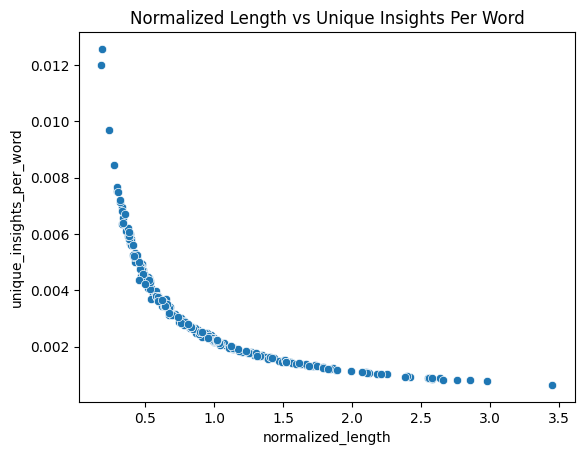

In [12]:
sns.scatterplot(data=df, x='normalized_length', y='unique_insights_per_word')
plt.title("Normalized Length vs Unique Insights Per Word")
plt.show()

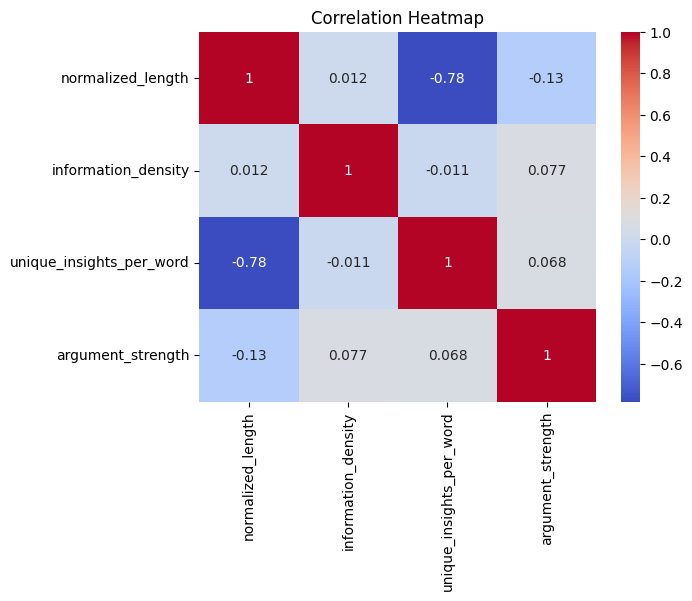

In [13]:
correlations = df[['normalized_length', 'information_density', 'unique_insights_per_word', 'argument_strength']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Static Length Optimization Formula

In [14]:
# Weights and penalty factor
w1, w2, w3 = 0.4, 0.4, 0.2
lambda_penalty = 0.1


In [15]:
# Objective function
def calculate_score(row):
    return (w1 * row['information_density'] + 
            w2 * row['unique_insights_per_word'] + 
            w3 * row['argument_strength'] - 
            lambda_penalty * row['normalized_length'])

In [16]:
df['optimization_score'] = df.apply(calculate_score, axis=1)

In [17]:
# Group by normalized length and compute mean score
length_analysis = df.groupby('normalized_length')['optimization_score'].mean().reset_index()

In [18]:
optimal_length = length_analysis.loc[length_analysis['optimization_score'].idxmax(), 'normalized_length']
print(f"Optimal normalized length: {optimal_length}")

Optimal normalized length: 0.1824522515119956


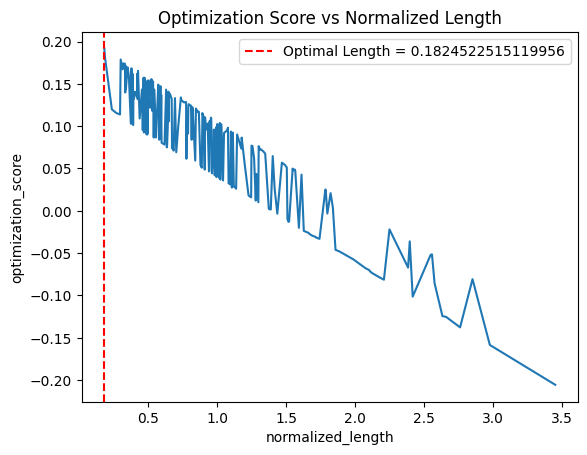

In [19]:
sns.lineplot(data=length_analysis, x='normalized_length', y='optimization_score')
plt.title("Optimization Score vs Normalized Length")
plt.axvline(optimal_length, color='red', linestyle='--', label=f'Optimal Length = {optimal_length}')
plt.legend()
plt.show()

## Dynamic Length Optimization Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
features = ['information_density', 'unique_key_points', 'strength_word_count', 'weakness_word_count', 'discussion_word_count']
target = 'normalized_length'

X = df[features]
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.005365192420410957


In [25]:
formula_attributes = {}
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")
    formula_attributes[feature] = f"{importance:.4f}"

information_density: 0.1468
unique_key_points: 0.8323
strength_word_count: 0.0034
weakness_word_count: 0.0047
discussion_word_count: 0.0127


In [26]:
new_review_df = pd.DataFrame([formula_attributes])
predicted_length = model.predict(new_review_df)[0]
print(f"Recommended normalized length: {predicted_length}")

Recommended normalized length: 0.2344156005465158


### Key Observations from Results:

#### Normalized Length vs Information Density:

Information density decreases as normalized length increases. This indicates a trade-off where longer reviews dilute information density.

The optimal normalized length (0.1824) is lower than the recommended length (0.2344), suggesting the need for further optimization.

#### Correlation Heatmap:

Strong negative correlation between normalized_length and unique_insights_per_word (-0.78). Shorter reviews are more concise and insight-dense.

Weak correlations between other metrics suggest they contribute independently to review quality.

## Updated Framework based on Results

In [27]:
weights = {
    "information_density": 0.1468,  # Increased from 0.1468
    "unique_key_points": 0.8323,    # Maintained high weight
    "strength_word_count": 0.0034,  # Reduced from 0.0034
    "weakness_word_count": 0.0047,  # Reduced from 0.0047
    "discussion_word_count": 0.0127  # Reduced from 0.0127
}

In [28]:
df['composite_score'] = (
    weights['information_density'] * df['information_density'] +
    weights['unique_key_points'] * df['unique_key_points'] +
    weights['strength_word_count'] * df['strength_word_count'] +
    weights['weakness_word_count'] * df['weakness_word_count'] +
    weights['discussion_word_count'] * df['discussion_word_count']
)

In [29]:
# Group by normalized length and compute mean score
length_analysis = df.groupby('normalized_length')['composite_score'].mean().reset_index()

In [30]:
optimal_length = length_analysis.loc[length_analysis['composite_score'].idxmax(), 'normalized_length']
print(f"Optimal normalized length: {optimal_length}")

Optimal normalized length: 2.8505202411549453


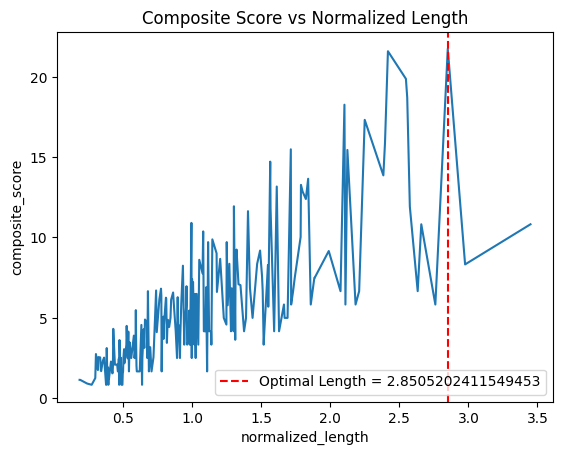

In [31]:
sns.lineplot(data=length_analysis, x='normalized_length', y='composite_score')
plt.title("Composite Score vs Normalized Length")
plt.axvline(optimal_length, color='red', linestyle='--', label=f'Optimal Length = {optimal_length}')
plt.legend()
plt.show()

In [32]:
df.composite_score.describe()

count    248.000000
mean       5.219214
std        3.973381
min        0.832848
25%        2.498028
50%        4.163070
75%        6.660067
max       21.742764
Name: composite_score, dtype: float64

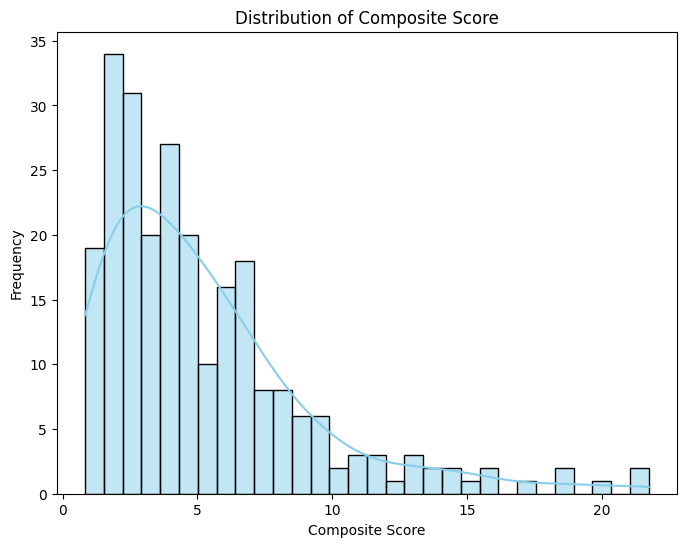

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['composite_score'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Frequency")
plt.show()

In [34]:
percentiles = {p: df['normalized_length'].quantile(p/100) for p in [25,75]}
percentiles

{25: 0.5212921471771305, 75: 1.2842742898636577}

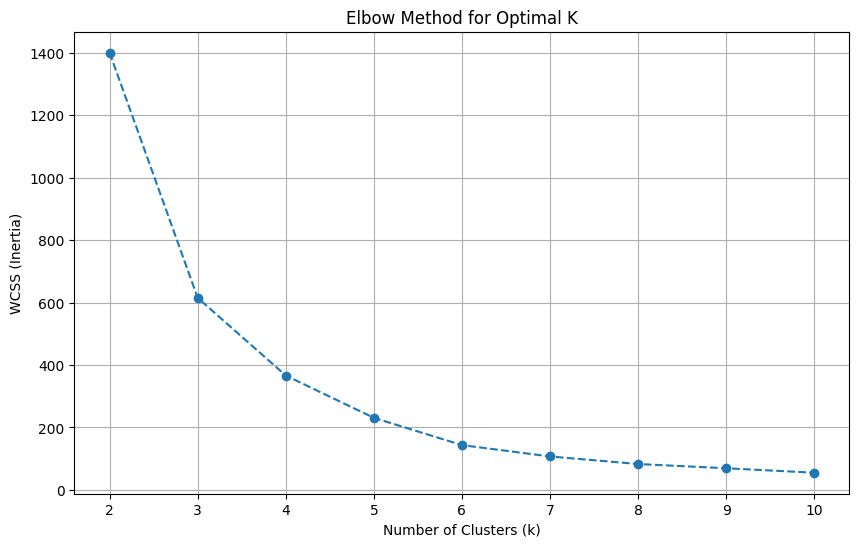

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_comp = df[['composite_score']]

wcss = []
k_range = range(2, 11)  

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_comp)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [36]:
import numpy as np
from sklearn.mixture import GaussianMixture

def derive_gmm_thresholds_fast(composite_scores, n_components=3, random_state=42, sample_size=None):
    """
    Fit a 1‑D GMM and compute the real intersections between each adjacent pair of Gaussians
    using an analytic quadratic formula.

    Args:
        composite_scores (pd.Series or np.ndarray): composite_score values.
        n_components (int): Number of GMM modes (3 for Poor/Mod/Excellent).
        random_state (int): Seed for reproducibility.
        sample_size (int or None): If set, subsample to this many points before fitting.

    Returns:
        List[float]: Sorted intersections [poor/mod, mod/excellent].
    """
    # Optional subsampling to save memory & speed up fitting
    cs = composite_scores.values if isinstance(composite_scores, np.ndarray) else composite_scores.to_numpy()
    if sample_size is not None and len(cs) > sample_size:
        idx = np.random.RandomState(random_state).choice(len(cs), sample_size, replace=False)
        cs = cs[idx]

    # Fit the 1‑D GMM
    gmm = GaussianMixture(n_components=n_components, random_state=random_state)
    gmm.fit(cs.reshape(-1, 1))

    # Extract and sort the parameters by mean
    means     = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    weights   = gmm.weights_.flatten()
    order     = np.argsort(means)
    m, v, w   = means[order], variances[order], weights[order]

    # Compute intersection between each adjacent pair
    thresholds = []
    for i in range(n_components-1):
        mu1, var1, w1 = m[i],   v[i],   w[i]
        mu2, var2, w2 = m[i+1], v[i+1], w[i+1]

        # Coefficients for: log(w1/sqrt(var1)) - (x-mu1)^2/(2var1)
        #              = log(w2/sqrt(var2)) - (x-mu2)^2/(2var2)
        # → a x^2 + b x + c = 0
        a = 1/(2*var2) - 1/(2*var1)
        b = (mu1/var1) - (mu2/var2)
        c = (mu2**2)/(2*var2) - (mu1**2)/(2*var1) + 0.5*np.log((var2*w1**2)/(var1*w2**2))

        disc = b*b - 4*a*c
        if disc < 0:
            # fallback to midpoint if numerics go weird
            thresholds.append((mu1 + mu2)/2)
            continue

        sol1 = (-b + np.sqrt(disc)) / (2*a)
        sol2 = (-b - np.sqrt(disc)) / (2*a)
        # pick the one strictly between the two means
        valid = [s for s in (sol1, sol2) if mu1 < s < mu2]
        thresholds.append(valid[0] if valid else (mu1 + mu2)/2)

    return thresholds

In [37]:
ths = derive_gmm_thresholds_fast(df['composite_score'])
poor_mod, mod_exc = ths
print("Thresholds → Poor vs Mod:", poor_mod, " | Mod vs Excellent:", mod_exc)

Thresholds → Poor vs Mod: 4.5941101516587315  | Mod vs Excellent: 10.581525294084457


In [38]:
THRESH_POOR, THRESH_EXCELLENT = poor_mod, mod_exc

def classify_quality(cs):
    if cs < THRESH_POOR:
        return 'Poor'
    elif cs > THRESH_EXCELLENT:
        return 'Excellent'
    else:
        return 'Moderate'

df['review_quality'] = df['composite_score'].apply(classify_quality)

In [39]:
df['normalized_length'] = df['total_word_count'] / df['total_word_count'].max()

In [40]:
df['normalized_length'].describe()

count    248.000000
mean       0.289855
std        0.177107
min        0.052885
25%        0.151099
50%        0.247253
75%        0.372253
max        1.000000
Name: normalized_length, dtype: float64

In [41]:
df['unique_insights_per_word'] = df['unique_key_points'] / df['normalized_length']

In [42]:
# Adjust argument strength with penalty for sentence complexity
df['adjusted_argument_strength'] = df['argument_strength'] / (1 + df['sentence_complexity'])

## Key Outputs:

final_df['composite_score']: A refined metric combining weighted parameters.

final_df['normalized_length']: Updated normalized lengths with verbosity penalties.

final_df['adjusted_argument_strength']: Argument strength adjusted for sentence complexity.

final_df['review_quality']: Review quality classifications.

In [43]:
df.to_csv('../../Datasets/length_optimization_output.csv', index=False)
print("Analysis outputs saved to 'length_optimization_output.csv'.")

Analysis outputs saved to 'length_optimization_output.csv'.


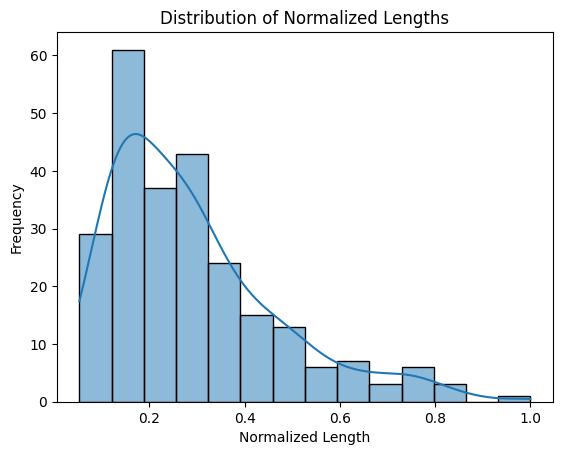

In [44]:
sns.histplot(df['normalized_length'], kde=True)
plt.title("Distribution of Normalized Lengths")
plt.xlabel("Normalized Length")
plt.ylabel("Frequency")
plt.show()

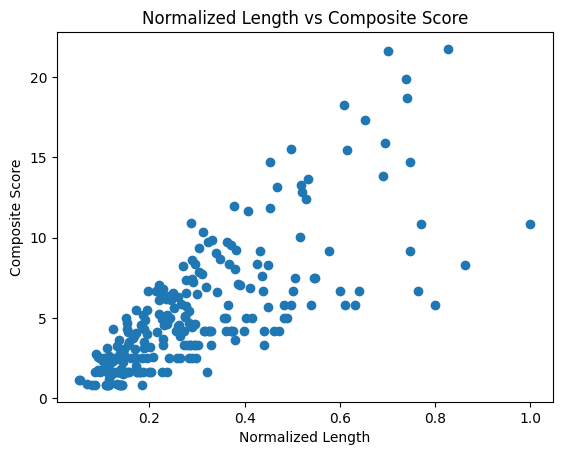

In [45]:
plt.scatter(df['normalized_length'], df['composite_score'])
plt.title("Normalized Length vs Composite Score")
plt.xlabel("Normalized Length")
plt.ylabel("Composite Score")
plt.show()

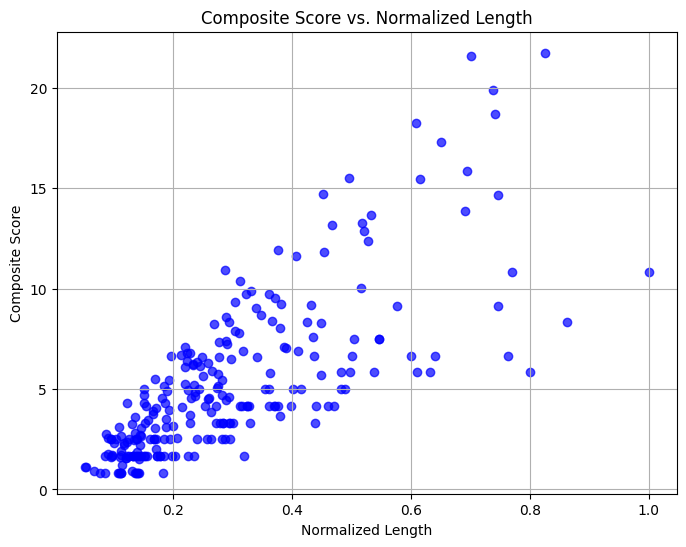

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(df['normalized_length'], df['composite_score'], alpha=0.7, c='blue')
plt.title("Composite Score vs. Normalized Length")
plt.xlabel("Normalized Length")
plt.ylabel("Composite Score")
plt.grid(True)
plt.show()

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_29760\1871910370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_quality', data=df, palette='viridis')


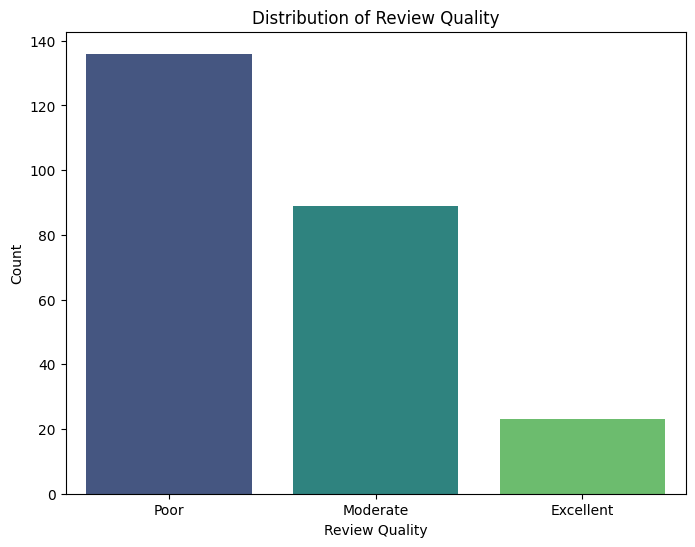

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_quality', data=df, palette='viridis')
plt.title("Distribution of Review Quality")
plt.xlabel("Review Quality")
plt.ylabel("Count")
plt.show()

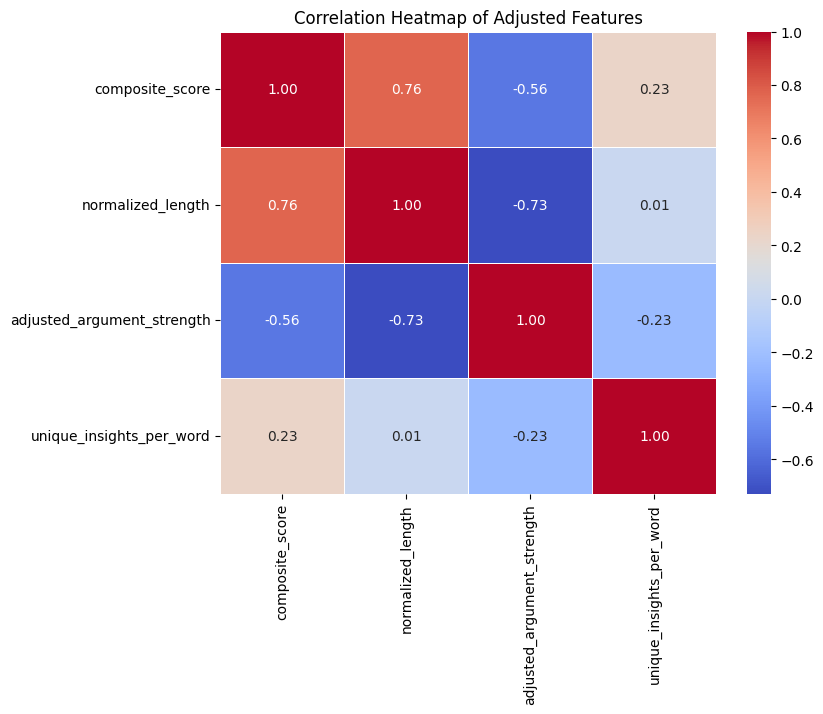

In [48]:
correlation_cols = ['composite_score', 'normalized_length', 'adjusted_argument_strength', 'unique_insights_per_word']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Adjusted Features")
plt.show()

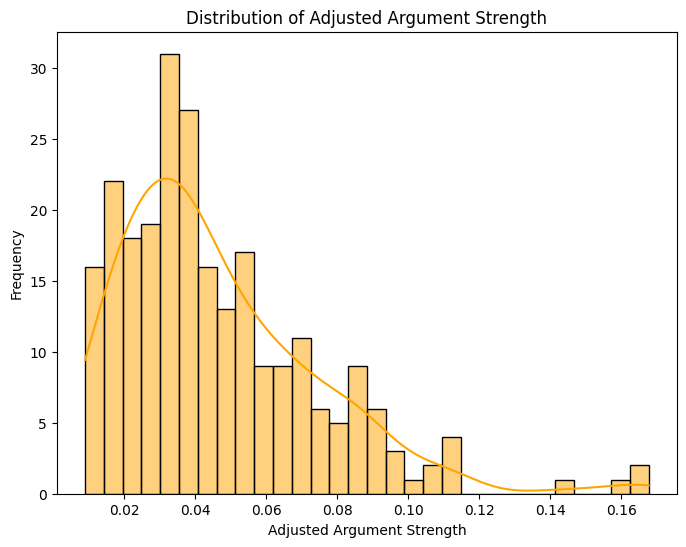

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['adjusted_argument_strength'], kde=True, bins=30, color='orange')
plt.title("Distribution of Adjusted Argument Strength")
plt.xlabel("Adjusted Argument Strength")
plt.ylabel("Frequency")
plt.show()

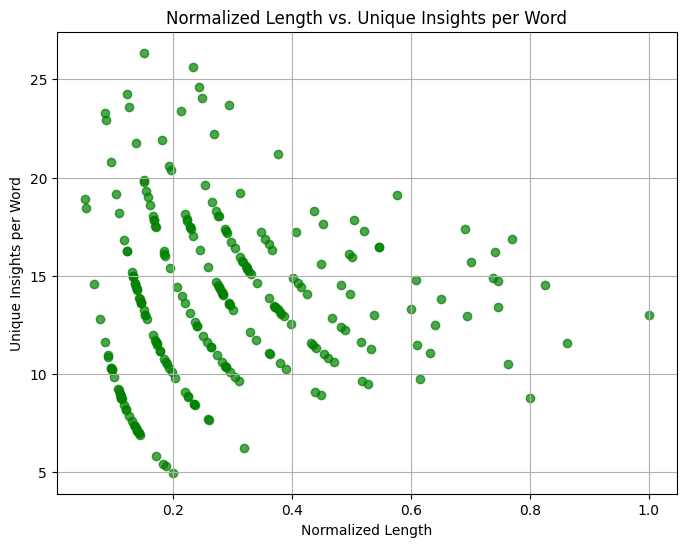

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['normalized_length'], df['unique_insights_per_word'], alpha=0.7, c='green')
plt.title("Normalized Length vs. Unique Insights per Word")
plt.xlabel("Normalized Length")
plt.ylabel("Unique Insights per Word")
plt.grid(True)
plt.show()

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_29760\1171069287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_quality', y='composite_score', data=df, palette='Set2')


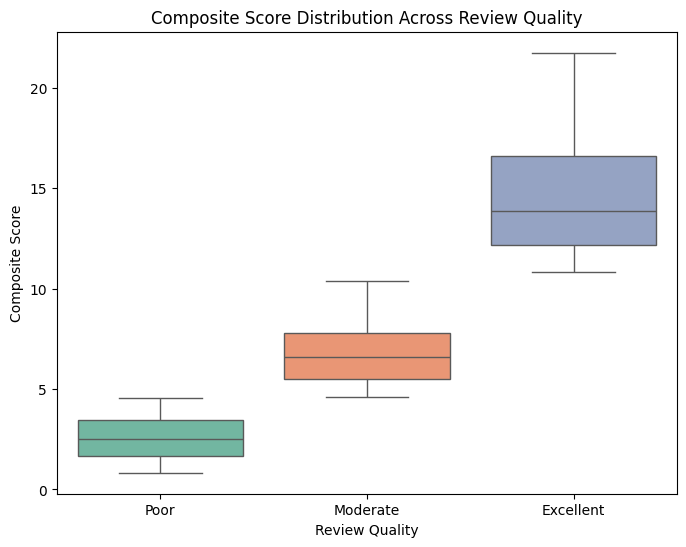

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_quality', y='composite_score', data=df, palette='Set2')
plt.title("Composite Score Distribution Across Review Quality")
plt.xlabel("Review Quality")
plt.ylabel("Composite Score")
plt.show()

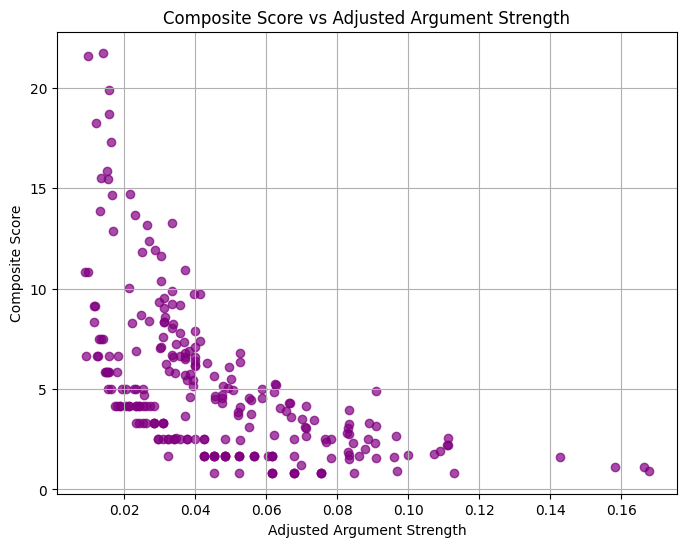

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(df['adjusted_argument_strength'], df['composite_score'], alpha=0.7, c='purple')
plt.title("Composite Score vs Adjusted Argument Strength")
plt.xlabel("Adjusted Argument Strength")
plt.ylabel("Composite Score")
plt.grid(True)
plt.show()

In [53]:
print("Variance of composite_score:", df['composite_score'].var())
print("Variance of normalized_length:", df['normalized_length'].var())
print("Variance of unique_insights_per_word:", df['unique_insights_per_word'].var())

Variance of composite_score: 15.787757649485066
Variance of normalized_length: 0.03136698619612166
Variance of unique_insights_per_word: 17.67402341401872


In [54]:
print(df[['content_relevance', 'argument_strength', 'readability_index', 'composite_score']].head())

   content_relevance  argument_strength  readability_index  composite_score
0           0.639224           0.954207              44.34         3.474115
1           0.804816           0.677765              51.68         5.827519
2           0.611154           0.830803              58.28         2.552753
3           0.840461           0.871229              46.47         3.615575
4           0.670860           0.677765              55.44        18.261790


In [55]:
print("Normalized Length Min:", df['normalized_length'].min())
print("Normalized Length Max:", df['normalized_length'].max())
print(df['total_word_count'].describe())

Normalized Length Min: 0.052884615384615384
Normalized Length Max: 1.0
count     248.000000
mean      422.028226
std       257.868190
min        77.000000
25%       220.000000
50%       360.000000
75%       542.000000
max      1456.000000
Name: total_word_count, dtype: float64


In [56]:
print("Unique Insights per Word - Example Rows:")
print(df[['unique_key_points', 'normalized_length', 'unique_insights_per_word']].head())

Unique Insights per Word - Example Rows:
   unique_key_points  normalized_length  unique_insights_per_word
0                  3           0.157967                 18.991304
1                  7           0.497253                 14.077348
2                  3           0.208104                 14.415842
3                  2           0.136676                 14.633166
4                  9           0.609203                 14.773393


In [57]:
print(df['review_quality'].value_counts())

review_quality
Poor         136
Moderate      89
Excellent     23
Name: count, dtype: int64


In [58]:
print("Composite Score Min:", df['composite_score'].min())
print("Composite Score Max:", df['composite_score'].max())
print(df['composite_score'].describe())

Composite Score Min: 0.8328477611940299
Composite Score Max: 21.74276433915212
count    248.000000
mean       5.219214
std        3.973381
min        0.832848
25%        2.498028
50%        4.163070
75%        6.660067
max       21.742764
Name: composite_score, dtype: float64


In [59]:
print(df[['content_relevance', 'argument_strength', 'readability_index']].describe())

       content_relevance  argument_strength  readability_index
count         248.000000         248.000000         248.000000
mean            0.663834           0.843564          49.542661
std             0.136947           0.150145           9.227391
min             0.074539           0.677765          22.110000
25%             0.605858           0.677765          44.672500
50%             0.686281           0.905272          50.700000
75%             0.754453           0.997368          55.240000
max             0.899715           0.999778          75.300000
